<a href="https://colab.research.google.com/github/ArijeetGoswami/STOCK-MARKET/blob/main/STOCK_MARKET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imoortation of libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr

#for data-set
import yfinance as yf


In [ ]:
#lets select the time frame
start = "2010-01-01"
end = "2020-01-01"
#import of data-set
stock = "GOG"   #COMPANY ID
google_data = yf.download(stock, start, end)   #here we are downloadoing the data-set

[*********************100%***********************]  1 of 1 completed


In [ ]:
google_data.head()

Open   High    Low  Close  Adj Close  Volume
Date                                                     
2010-01-04  0.225  0.230  0.225  0.225      0.225   44242
2010-01-05  0.225  0.235  0.225  0.235      0.235   76000
2010-01-06  0.240  0.250  0.235  0.235      0.235   45600
2010-01-07  0.235  0.240  0.235  0.240      0.240    7500
2010-01-08  0.230  0.260  0.230  0.260      0.260   36100

In [ ]:
google_data.tail()

Open   High    Low  Close  Adj Close  Volume
Date                                                     
2018-01-24  0.045  0.045  0.045  0.045      0.045       0
2018-01-25  0.045  0.045  0.045  0.045      0.045       0
2018-01-26  0.050  0.050  0.050  0.050      0.050   10000
2018-01-29  0.050  0.050  0.050  0.050      0.050       0
2018-01-30  0.040  0.040  0.040  0.040      0.040    5000

In [ ]:
df1 = google_data.reset_index()
df1.head()

Date   Open   High    Low  Close  Adj Close  Volume
0 2010-01-04  0.225  0.230  0.225  0.225      0.225   44242
1 2010-01-05  0.225  0.235  0.225  0.235      0.235   76000
2 2010-01-06  0.240  0.250  0.235  0.235      0.235   45600
3 2010-01-07  0.235  0.240  0.235  0.240      0.240    7500
4 2010-01-08  0.230  0.260  0.230  0.260      0.260   36100

In [ ]:
#dropping of columns date and adj close
df1.drop(['Date','Adj Close'], axis = 1)

Open   High    Low  Close  Volume
0     0.225  0.230  0.225  0.225   44242
1     0.225  0.235  0.225  0.235   76000
2     0.240  0.250  0.235  0.235   45600
3     0.235  0.240  0.235  0.240    7500
4     0.230  0.260  0.230  0.260   36100
...     ...    ...    ...    ...     ...
1964  0.045  0.045  0.045  0.045       0
1965  0.045  0.045  0.045  0.045       0
1966  0.050  0.050  0.050  0.050   10000
1967  0.050  0.050  0.050  0.050       0
1968  0.040  0.040  0.040  0.040    5000

[1969 rows x 5 columns]

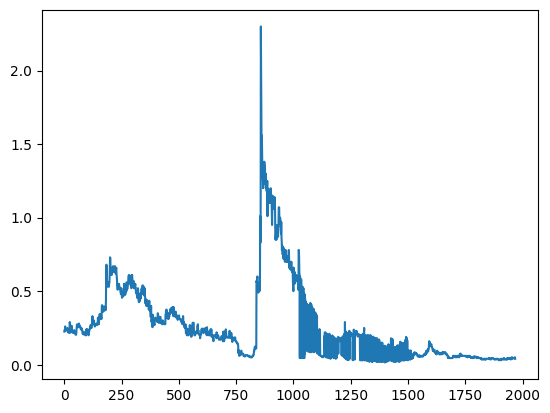

In [ ]:
#plotting
plt.plot(df1.Close)   #shownig the closing proce of google stocks


In [ ]:
#utliozation of rooling function]
#for the avreage 100 days

ma100 = df1.Close.rolling(100).mean()   #moving average of 100 days
ma100

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
1964    0.03940
1965    0.03940
1966    0.03945
1967    0.03950
1968    0.03945
Name: Close, Length: 1969, dtype: float64

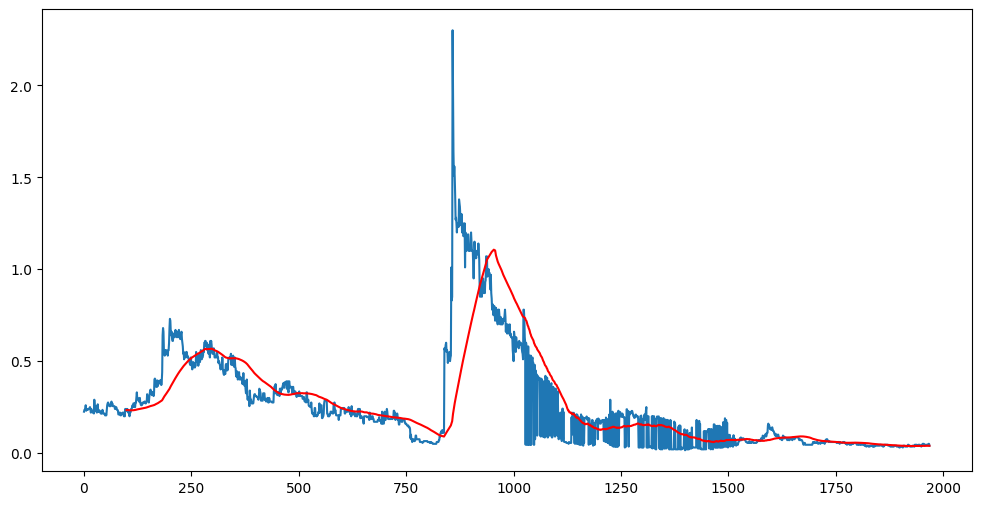

In [ ]:
#now lets plot the moving average on the closing graph
plt.figure(figsize = (12,6))
plt.plot(df1.Close)
plt.plot(ma100, 'r')

In [ ]:
#lets do it for 300 days
ma200 = df1.Close.rolling(300).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1964    0.047067
1965    0.046983
1966    0.046900
1967    0.046817
1968    0.046717
Name: Close, Length: 1969, dtype: float64

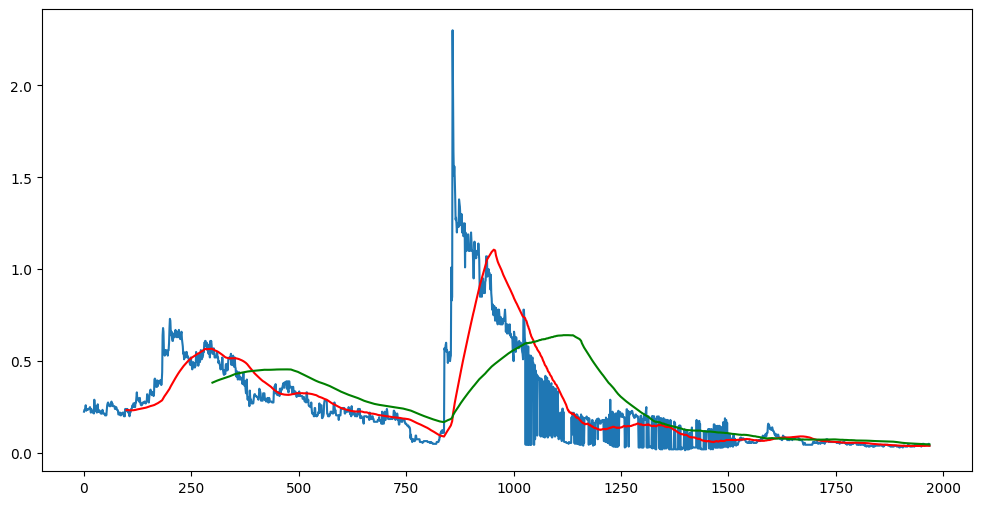

In [ ]:
#lets inclue ma300 avrage into othe graph
plt.figure(figsize=(12,6))
plt.plot(df1["Close"])
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [ ]:
#lets see the rows and columns
df1.shape

(1969, 7)

In [ ]:
data_training = pd.DataFrame(df1['Close'][0:int(len(df1)*0.70)])   #strtin from 0 to 70% of total values
data_testing = pd.DataFrame(df1['Close'][int(len(df1)*0.70):int(len(df1))])   #starting from 70% to complete length of the data-set

In [ ]:
#lets see the shape
print(data_training.shape)
print(data_testing.shape)

(1378, 1)
(591, 1)


In [ ]:
#ltese see the data_training and dara_teating
data_training.head()

Close
0  0.225
1  0.235
2  0.235
3  0.240
4  0.260

In [ ]:
data_testing.head()

Close
1378   0.02
1379   0.02
1380   0.02
1381   0.02
1382   0.02

In [ ]:
#lets scale down the data
#preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))    #scaled down the array

In [ ]:
#lets covert data into array
data_training_array = scaler.fit_transform(data_training)
data_testing_array = scaler.fit_transform(data_testing)

In [ ]:
data_testing_array


array([[0.02873563],
       [0.02873563],
       [0.02873563],
       [0.02873563],
       [0.02873563],
       [0.02873563],
       [0.74137929],
       [0.05747127],
       [0.77586212],
       [0.02873563],
       [0.77011499],
       [0.02873563],
       [0.02873563],
       [0.02873563],
       [0.0862069 ],
       [0.05747127],
       [0.05747127],
       [0.05747127],
       [0.05747127],
       [0.60344828],
       [0.65517239],
       [0.        ],
       [0.02873563],
       [0.54597702],
       [0.54022988],
       [0.02873563],
       [0.63218392],
       [0.02873563],
       [0.02873563],
       [0.02873563],
       [0.02873563],
       [0.52873565],
       [0.05747127],
       [0.54597702],
       [0.05747127],
       [0.54597702],
       [0.05747127],
       [0.71264369],
       [0.11494253],
       [0.0862069 ],
       [0.0862069 ],
       [0.0862069 ],
       [0.0862069 ],
       [0.0862069 ],
       [0.0862069 ],
       [0.0862069 ],
       [0.0862069 ],
       [0.086

In [ ]:
data_training_array

array([[0.08991228],
       [0.09429825],
       [0.09429825],
       ...,
       [0.06140351],
       [0.06140351],
       [0.        ]])

In [ ]:
#lets look at the shape
data_training_array.shape

(1378, 1)

In [ ]:
#lets declare x_train and y_train requird for traning the model
x_train = []    #sum of 100 days
y_train = []    #101 day will be y

#for loop
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])   #only 1 column


In [ ]:
#lets chcek
x_train, y_train

([array([[0.08991228],
         [0.09429825],
         [0.09429825],
         [0.09649123],
         [0.10526316],
         [0.09210527],
         [0.09649123],
         [0.09649123],
         [0.09429825],
         [0.09429825],
         [0.09649123],
         [0.09649123],
         [0.09649123],
         [0.09868421],
         [0.1008772 ],
         [0.09429825],
         [0.0877193 ],
         [0.09649123],
         [0.08991228],
         [0.08991228],
         [0.08991228],
         [0.0877193 ],
         [0.0877193 ],
         [0.08552632],
         [0.11842105],
         [0.10307018],
         [0.09429825],
         [0.09210527],
         [0.10307018],
         [0.08991228],
         [0.0877193 ],
         [0.09210527],
         [0.10745614],
         [0.08991228],
         [0.09429825],
         [0.08991228],
         [0.08991228],
         [0.09210527],
         [0.0877193 ],
         [0.08552632],
         [0.08552632],
         [0.0877193 ],
         [0.08552632],
         [0

In [ ]:
#convert x_train and y_train into numpy array
#to putilize data in lsvm
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(1278, 100, 1)

In [ ]:
#now our data-set is ready for ML ALgo


In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
#modle
#layer -1
m = Sequential()
m.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
m.add(Dropout(0.2))

# layer 2
m = Sequential()
m.add(LSTM(units = 60, activation = 'relu', return_sequences = True ))
m.add(Dropout(0.3))

# layer 3
m = Sequential()
m.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
m.add(Dropout(0.4))

#layer 4
m = Sequential()
m.add(LSTM(units = 120, activation = 'relu',))
m.add(Dropout(0.5))


m.add(Dense(units = 1))   #predicting only one value

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
m.compile(optimizer='adam', loss = 'mean_squared_error')
m.fit(x_train,y_train, epochs=50)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0203
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - loss: 0.0029
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - loss: 0.0029
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - loss: 0.0032
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - loss: 0.0024
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - loss: 0.0021
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - loss: 0.0029
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 0.0030
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - loss: 0.0018
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 0.0020
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 0.0025
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 155ms/step - loss: 0.0019
Epoch 13/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - loss: 0.0021
Epoch 14/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 0.0020
Epoch 15/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 0.00

In [ ]:
#lets save the model
m.save('keras_model.h5')

In [ ]:
#lets go ahead witn the testing data
data_testing.head()

Close
1378   0.02
1379   0.02
1380   0.02
1381   0.02
1382   0.02

In [ ]:
#we will take previous 100 days
past_100_days = data_training.tail(100)

In [ ]:
#now the fianl data-frame
import pandas as pd # Import the pandas library

#now the fianl data-frame
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)   #utlize instead of append

In [ ]:
#lets view the data-set
final_df.head()

#37:22

Close
0  0.210
1  0.200
2  0.200
3  0.191
4  0.192

In [ ]:
#lets perform scaleer operation
input_data = scaler.fit_transform(final_df)

In [ ]:
input_data

array([[0.82978721],
       [0.78723406],
       [0.78723406],
       [0.74893617],
       [0.7531915 ],
       [0.80851063],
       [0.82553194],
       [0.82553194],
       [0.78723406],
       [0.78723406],
       [0.77446807],
       [0.78723406],
       [0.72765959],
       [0.06382979],
       [0.06382979],
       [0.06382979],
       [0.06382979],
       [0.78723406],
       [0.78723406],
       [0.8042553 ],
       [0.06382979],
       [0.06382979],
       [0.06382979],
       [0.72340427],
       [0.06382979],
       [0.77021274],
       [0.78723406],
       [0.82978721],
       [0.70638295],
       [0.77021274],
       [0.91489363],
       [1.        ],
       [0.06382979],
       [0.78723406],
       [0.06382979],
       [0.78723406],
       [0.78723406],
       [0.06382979],
       [0.08510638],
       [0.08510638],
       [0.08510638],
       [0.08510638],
       [0.06382979],
       [0.06382979],
       [0.78723406],
       [0.04255319],
       [0.78723406],
       [0.787

In [ ]:
input_data.shape

(691, 1)

In [ ]:
#now again define the x_test and y_test
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [ ]:
x_test,y_test = np.array(x_test), np.array(y_test)

In [ ]:
#lets see the rows and column
print(x_test.shape)
print(y_test.shape)

(591, 100, 1)
(591,)


In [ ]:
# market predictions
y_predict = m.predict(x_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


In [ ]:
y_predict.shape

(591, 1)

In [ ]:
y_test

array([0.0212766 , 0.0212766 , 0.0212766 , 0.0212766 , 0.0212766 ,
       0.0212766 , 0.54893614, 0.04255319, 0.57446811, 0.0212766 ,
       0.57021278, 0.0212766 , 0.0212766 , 0.0212766 , 0.06382979,
       0.04255319, 0.04255319, 0.04255319, 0.04255319, 0.4468085 ,
       0.48510635, 0.        , 0.0212766 , 0.40425532, 0.39999999,
       0.0212766 , 0.46808511, 0.0212766 , 0.0212766 , 0.0212766 ,
       0.0212766 , 0.39148937, 0.04255319, 0.40425532, 0.04255319,
       0.40425532, 0.04255319, 0.52765957, 0.08510638, 0.06382979,
       0.06382979, 0.06382979, 0.06382979, 0.06382979, 0.06382979,
       0.06382979, 0.06382979, 0.06382979, 0.70212769, 0.08510638,
       0.08510638, 0.04255319, 0.04255319, 0.04255319, 0.68085105,
       0.04255319, 0.61276593, 0.04255319, 0.04255319, 0.0212766 ,
       0.0212766 , 0.0212766 , 0.0212766 , 0.0212766 , 0.0212766 ,
       0.4425532 , 0.0212766 , 0.42553192, 0.4468085 , 0.0212766 ,
       0.0212766 , 0.40425532, 0.4425532 , 0.4425532 , 0.44255

In [ ]:
y_predict

array([[0.30807444],
       [0.23508167],
       [0.1806553 ],
       [0.140618  ],
       [0.11080935],
       [0.08856703],
       [0.07201678],
       [0.19170408],
       [0.15014589],
       [0.26719084],
       [0.20384282],
       [0.30541292],
       [0.2314823 ],
       [0.18060559],
       [0.14247814],
       [0.11825997],
       [0.09806801],
       [0.08306681],
       [0.07198165],
       [0.06382249],
       [0.16016474],
       [0.25107384],
       [0.19232205],
       [0.15344813],
       [0.21247336],
       [0.2595428 ],
       [0.20174283],
       [0.2734952 ],
       [0.21081665],
       [0.16647854],
       [0.13303891],
       [0.10763375],
       [0.17002317],
       [0.13729176],
       [0.20328924],
       [0.1629211 ],
       [0.22460073],
       [0.17919621],
       [0.27960524],
       [0.22472352],
       [0.18246715],
       [0.15035892],
       [0.12626174],
       [0.10825263],
       [0.09476641],
       [0.08470665],
       [0.07726029],
       [0.071

In [ ]:
#lets match the values
#before scale up
scaler.scale_    #scale factor

array([4.25531914])

In [ ]:
#lets cjhcek the scale factor
scale_factor = 1/4.25531914
y_predict = y_predict * scale_factor
y_test = y_test * scale_factor

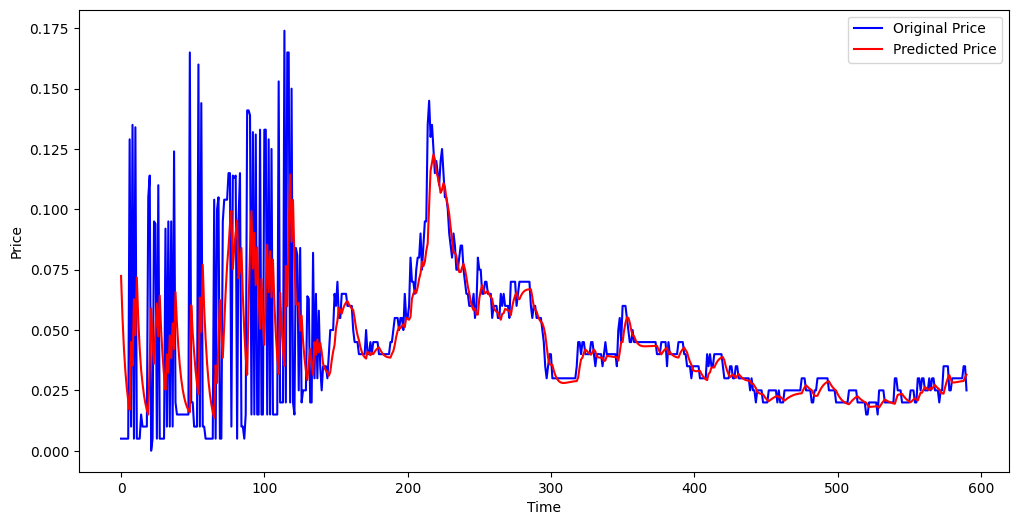

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()